In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io, utils
from cellpose.io import imread
from pathlib import Path
import os
from PIL import Image

In [5]:
# List of Files
# Importing all the files
basedir = os.path.join(Path.cwd(), "Images")
files = io.get_image_files(basedir, "")

# Makes the directy to point to the seg files
dir = []
for f in files: 
    dir.append((os.path.join(basedir, f) + "_seg.npy").replace(".png", ""))
dir = dir[0:2]


In [16]:
def checkROI(outA, outB): 
    lent = len(outA[0]) 
    count = 0 
    outCount = 0 
    # We iterate through the entire matrix which represents the two outlines. 
    for i in range(lent): 
        for j in range(lent - 1):
            if (outA[i][j] != 0):  # Find how many pixels are used to make the outlines
                outCount += 1      # outCount gives the number of pixels to create the outlines
                if outB[i][j] != 0:
                    count +=1      # The number of overlapping pixels in the first and second outlines
    if outCount == 0:
        print("no overlap") 
        return False
    elif count/outCount * 100 >= 10: 
        print("Overlap: ", count/outCount * 100 ) # If more that 10% of it overlaps, we say it's the same cell
        return True
    elif count > 0: 
        print("Some Overlap:", count/outCount * 100) 
        return False 
    else: 
        return False

In [15]:
datFirst = np.load(dir[1], allow_pickle=True).item()
outlines = datFirst['outlines']
maskFirst = datFirst['masks']
imageFirst = datFirst['img']
flowsFirst = datFirst['flows']
diamFirst = datFirst['est_diam']
filenameFirst = datFirst['filename']
chanFirst = datFirst['chan_choose']

arr = maskFirst
arr[arr == 5] = 130

cout = 0 
for p in range(len(arr)): 
    for q in range(len(arr) - 1): 
        if arr[p][q] == 5:
            cout += 1 

cout
arr[arr == 6] = 5
arr[arr == 130] = 6

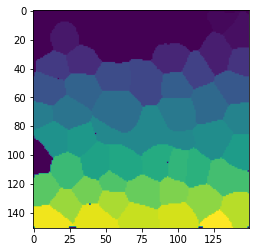

In [20]:
dat0 = np.load(dir[0], allow_pickle=True).item()
mask0 = dat0['masks']

plt.imshow(mask0)
